In [1]:
import pandas as pd
excel_file = r'C:\Users\i353455\Desktop\rapper-comparison\english_rapper_dataset.xlsx'
movies = pd.read_excel(excel_file)
movies.head()

,rapper_name,song_name,lyrics,id
0,Eminem,Killshot,"You sound like a bitch, bitch Shut the fuck up...",1
1,Machine Gun Kelly,Rad Devil,"Oh my god, Ronny Ay, somebody grab him some cl...",2


In [2]:
import re
import string
def clean_text_round1(text):
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = text.replace('।','')
    text = text.lower()
    text = re.sub('[0-9]', '', text)
    return text
round_1 = lambda x:clean_text_round1(x)

In [3]:
data_clean = pd.DataFrame(movies['lyrics'].apply(round_1))
data_clean

,lyrics
0,you sound like a bitch bitch shut the fuck up ...
1,oh my god ronny ay somebody grab him some clip...


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(movies['lyrics'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = movies.rapper_name
data_dtm

,02,20,2012,29,45,46,50,80,accordin,acknowledge,...,year,years,yelawolf,yell,yellin,yelling,yo,young,younger,zzzzt
rapper_name,,,,,,,,,,,,,,,,,,,,,
Eminem,1,1,0,1,1,0,0,1,0,0,...,3,0,0,1,2,1,1,1,1,0
Machine Gun Kelly,0,0,1,0,1,1,2,0,1,2,...,1,2,1,0,1,0,0,1,1,1


In [5]:
data_dtm = data_dtm.transpose()
top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Eminem': [('fuckin', 9),
  ('got', 8),
  ('like', 8),
  ('just', 7),
  ('bitch', 7),
  ('ll', 5),
  ('cause', 5),
  ('old', 5),
  ('fuck', 5),
  ('talk', 5),
  ('really', 4),
  ('don', 4),
  ('let', 4),
  ('mic', 4),
  ('day', 4),
  ('want', 3),
  ('ho', 3),
  ('beard', 3),
  ('gun', 3),
  ('oh', 3),
  ('hit', 3),
  ('lil', 3),
  ('sick', 3),
  ('mouth', 3),
  ('diddy', 3),
  ('know', 3),
  ('weird', 3),
  ('kelly', 3),
  ('albums', 3),
  ('year', 3)],
 'Machine Gun Kelly': [('talk', 15),
  ('let', 13),
  ('know', 9),
  ('sick', 8),
  ('ll', 7),
  ('mad', 7),
  ('just', 7),
  ('like', 6),
  ('ay', 6),
  ('bitch', 5),
  ('ain', 5),
  ('fuckin', 5),
  ('body', 5),
  ('rapper', 5),
  ('bein', 4),
  ('single', 4),
  ('god', 4),
  ('got', 4),
  ('gully', 4),
  ('chalk', 4),
  ('dads', 4),
  ('album', 4),
  ('midwest', 4),
  ('hats', 4),
  ('rich', 4),
  ('called', 4),
  ('damn', 4),
  ('sweatsuits', 4),
  ('size', 4),
  ('yeah', 4)]}

In [6]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Eminem
fuckin, got, like, just, bitch, ll, cause, old, fuck, talk, really, don, let, mic
---
Machine Gun Kelly
talk, let, know, sick, ll, mad, just, like, ay, bitch, ain, fuckin, body, rapper
---


In [7]:
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data_dtm.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['fuckin',
 'got',
 'like',
 'just',
 'bitch',
 'll',
 'cause',
 'old',
 'fuck',
 'talk',
 'really',
 'don',
 'let',
 'mic',
 'day',
 'want',
 'ho',
 'beard',
 'gun',
 'oh',
 'hit',
 'lil',
 'sick',
 'mouth',
 'diddy',
 'know',
 'weird',
 'kelly',
 'albums',
 'year',
 'talk',
 'let',
 'know',
 'sick',
 'll',
 'mad',
 'just',
 'like',
 'ay',
 'bitch',
 'ain',
 'fuckin',
 'body',
 'rapper',
 'bein',
 'single',
 'god',
 'got',
 'gully',
 'chalk',
 'dads',
 'album',
 'midwest',
 'hats',
 'rich',
 'called',
 'damn',
 'sweatsuits',
 'size',
 'yeah']

In [8]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

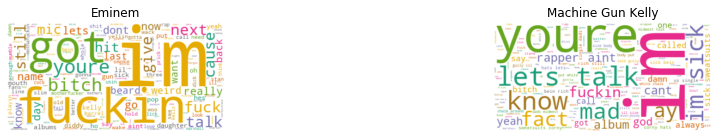

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 2]

full_names = ['Eminem','Machine Gun Kelly']

# Create subplots for each comedian
for index, comedian in enumerate(data_dtm.columns):
    wc.generate(data_clean.lyrics[index])
    
    plt.subplot(1, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [10]:
unique_list = []
for rapper in data_dtm.columns:
    uniques = data_dtm[rapper].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['rapper', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


,rapper,unique_words
1,Machine Gun Kelly,328
0,Eminem,339


In [11]:
total_list = []
for rapper in data_dtm.columns:
    totals = sum(data_dtm[rapper])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [4.13,4.47]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,rapper,unique_words,total_words,run_times,words_per_minute
0,Eminem,339,482,4.13,116.707022
1,Machine Gun Kelly,328,538,4.47,120.357942


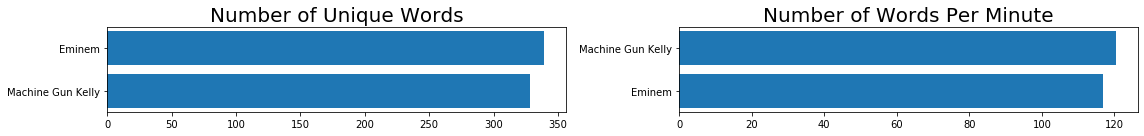

In [12]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.rapper)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.rapper)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()